In [ ]:
# 1.Introduction to Python

    # 1.1 MATPLOTLIB
    # 1.2 Dictionnary
    # 1.3 PANDAS
    # 1.4 WHILE AND FOR LOOPS
    
# 2. PYTHON DATA SCIENCE TOOLBOX

    # 2.1 SCOPE
    # 2.2 NESTED FUNCTION
    # 2.3 LAMBDA FUNCTION

# 3. CLEANING DATA

    # 3.1 Filtering Data
    # 3.2 EXPLORATORY DATA ANALYSIS
    # 3.3 TIDY DATA
    # 3.4 PIVOTING DATA
    # 3.5 CONCATENATING DATA
    # 3.5 Data types

# 4. PANDAS FOUNDATION

    # 4.1 Building data frames from scratch

# 5. MANIPULATING DATA FRAMES WITH PANDAS

   # 5.1 Indexing data frame 
   # 5.2 Slicing the data
   # 5.3 Filtering data frames
   # 5.4 Transforming data
   # 5.5 INDEX OBJECTS AND LABELED DATA
    
  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for graphs
import seaborn as sns # for graphs

sns.set()

# Close warnings
import warnings 
warnings.filterwarnings("ignore")




# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None)

/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2018.csv


In [2]:
# Read the data 
data = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
data.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [3]:
data.info()  # Attribute the content of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
data.rename(columns= {"GDP per capita": "economy","Score":"Happiness_Score","Healthy life expectancy":"health", "Freedom to make life choices":"freedom",
                     "Perceptions of corruption":"trust","Social support":"family", "Country or region":"country"},inplace = True)


In [5]:
data.shape #Shape give number of rows and columns in a tuple

(156, 9)

In [6]:
data.columns

Index(['Overall rank', 'country', 'Happiness_Score', 'economy', 'family',
       'health', 'freedom', 'Generosity', 'trust'],
      dtype='object')

In [7]:
data.describe()  # Describing data


,Overall rank,Happiness_Score,economy,family,health,freedom,Generosity,trust
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
data.head(20)

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [9]:
data.tail(20)

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
136,137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067
137,138,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087
138,139,Togo,4.085,0.275,0.572,0.410,0.293,0.177,0.085
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033
141,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
145,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [10]:
data.dtypes

Overall rank         int64
country             object
Happiness_Score    float64
economy            float64
family             float64
health             float64
freedom            float64
Generosity         float64
trust              float64
dtype: object

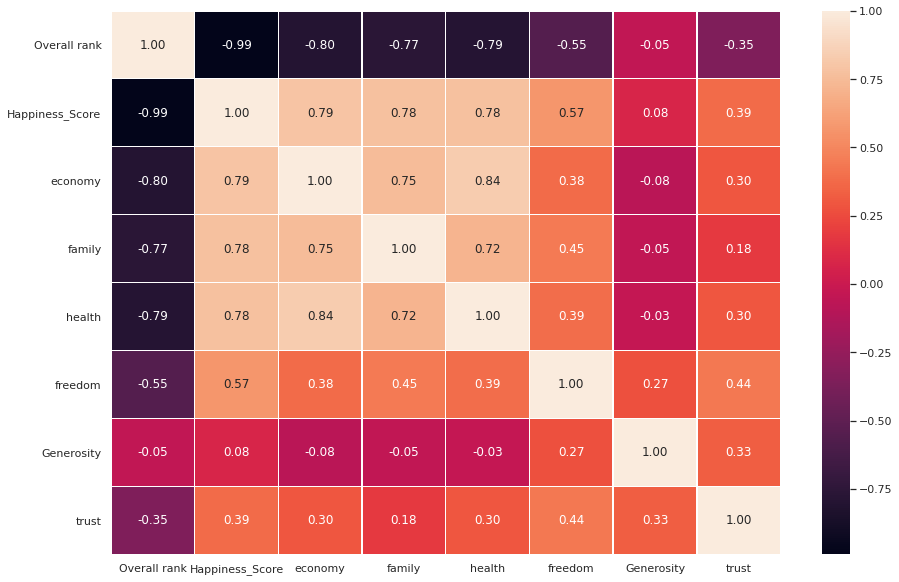

In [11]:
# Correlation map
# Display the negative and postive correlation between variables
data.corr
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot =True, linewidth =".5", fmt =".2f")
plt.show()


#figsize - image size
#data.corr() - Display positive and negative correlation between columns
#annot=True -shows correlation rates
#linewidths - determines the thickness of the lines in between
#cmap - determines the color tones we will use
#fmt - determines precision(Number of digits after 0)
#if the correlation between the two columns is close to 1 or 1, the correlation between the two columns has a positive ratio.
#if the correlation between the two columns is close to -1 or -1, the correlation between the two columns has a negative ratio.
#If it is close to 0 or 0 there is no relationship between them.

In [12]:
# Checking missing values
data.isnull()

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [13]:
# Indicates values not defined in our data frame

data.isnull().sum()


Overall rank       0
country            0
Happiness_Score    0
economy            0
family             0
health             0
freedom            0
Generosity         0
trust              0
dtype: int64

In [14]:
# Indicates sum of missing values in our data

data.isnull().sum().sum()

0

In [15]:
data[["Happiness_Score"]].isnull().head(10)

,Happiness_Score
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [16]:
data.sort_values("Happiness_Score", ascending = False).head(10)

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [17]:
data.sort_values("Happiness_Score", ascending =True).head(10)

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110


# 1.Introduction to Python:

##### 1.1 MATPLOTLIB

In [18]:
# matplotlib is a library of python programming language for plotting graphs, there are sevearl types of graphs;
 # Line plot is better when x axis is time.
 # Scatter is better when there is correlation between two variables
 # Histogram is better when we need to see distribution of numerical data.
 # Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

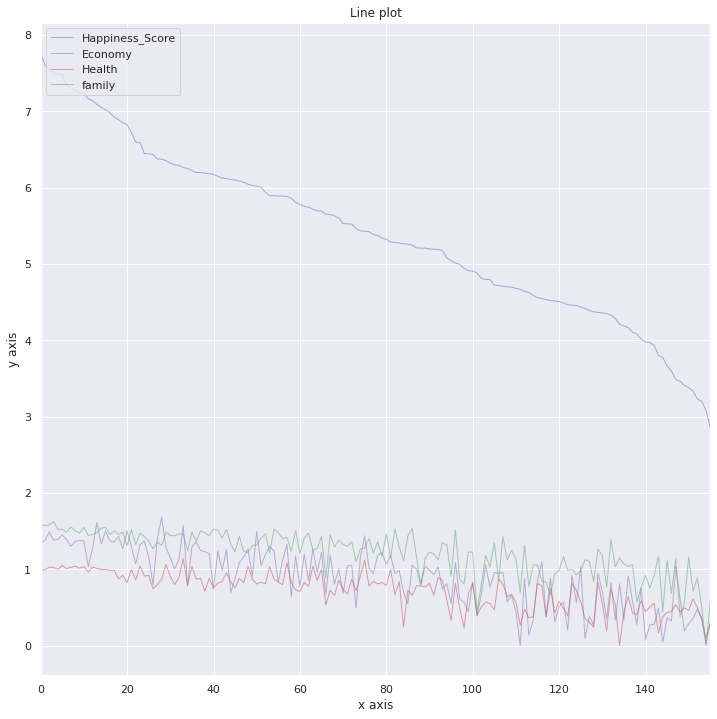

In [19]:
 # LINE PLOT
    
 # color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line  
data.Happiness_Score.plot(kind="line", color="B", label="Happiness_Score", linewidth=1, alpha=0.5, grid=True, figsize=(12,12))    
data.economy.plot(kind="line", color="m", label="Economy", linewidth=1, alpha=0.5, grid=True)  
data.health.plot(kind="line", color="r", label="Health", linewidth=1, alpha=0.5, grid=True)
data.family.plot(kind="line", color="G", label="family", linewidth=1, alpha=0.5, grid=True)
plt.legend(loc="upper left")  # legends= Put labels into plot
plt.xlabel("x axis")          # label = name of label
plt.ylabel("y axis")
plt.title("Line plot")        # Title of the plot
plt.show()


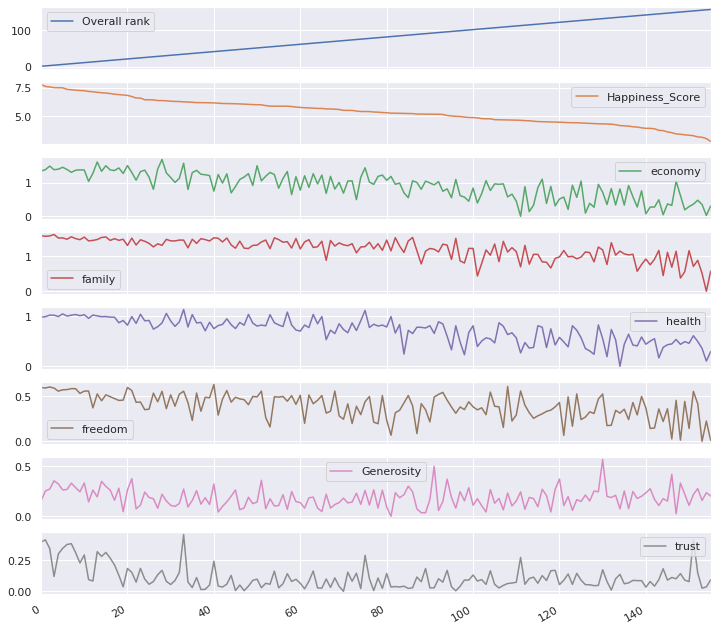

In [20]:
# Subplots

data.plot(subplots = True, figsize=(12,12))
plt.show()

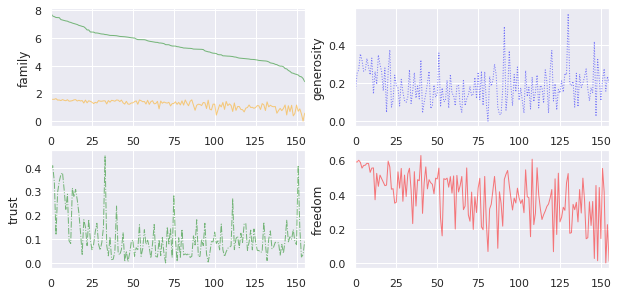

In [21]:

plt.subplot(4,2,1)
data.family.plot(kind="line", color="orange", label="family", linewidth=1, alpha=0.5, grid=True, figsize=(10,10))
data.Happiness_Score.plot(kind="line", color="green", label="family", linewidth=1, alpha=0.5, grid=True, figsize=(10,10))
plt.ylabel("family")
plt.subplot(4,2,2)
data.Generosity.plot(kind="line", color="blue", label="Generosity", linewidth=1, alpha=0.5, grid=True, linestyle=":")
plt.ylabel("generosity")
plt.subplot(4,2,3)
data.trust.plot(kind="line", color="green", label="trust", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
plt.ylabel("trust")
plt.subplot(4,2,4)
data.freedom.plot(kind="line", color="red", label="freedom", linewidth=1, alpha=0.5, grid=True)
plt.ylabel("freedom")
plt.show()

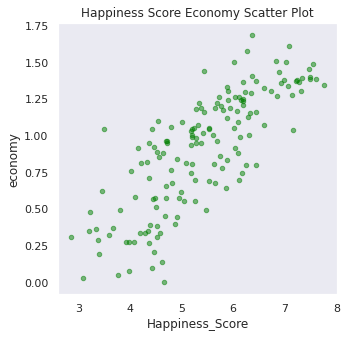

In [22]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind="scatter", x="Happiness_Score", y="economy", alpha=0.5, color="green", grid= False, figsize=(5,5))
plt.xlabel("Happiness_Score")    # label = name of label
plt.ylabel("economy")
plt.title("Happiness Score Economy Scatter Plot") # title = title of plot
plt.show()

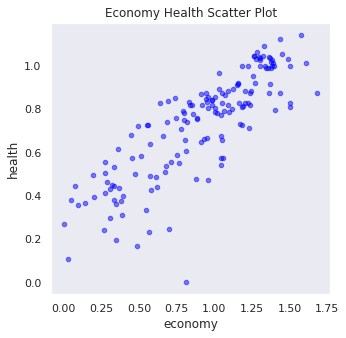

In [23]:
data.plot(kind="scatter", x="economy", y="health", alpha=0.5, color="blue",grid =False, figsize=(5,5))
plt.xlabel("economy")    # label = name of label
plt.ylabel("health")
plt.title("Economy Health Scatter Plot") # title = title of plot
plt.show()

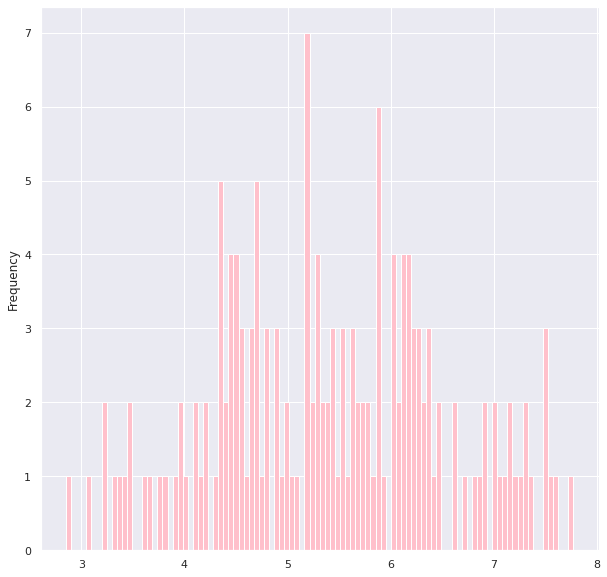

In [24]:
# Histogram
# bins = number of bar in figure

data.Happiness_Score.plot(kind="hist",color="pink", bins=100, figsize=(10,10))
plt.show()

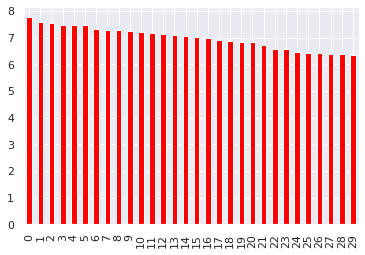

In [25]:
data.Happiness_Score.head(30).plot(kind="bar",color="red")
plt.show()

###### 1.2 Dictionnary

In [26]:
dictionary={"Sweden":"Stockholm", "France":"Paris"}
print(dictionary.keys())

print(dictionary.values())

dict_keys(['Sweden', 'France'])
dict_values(['Stockholm', 'Paris'])


In [27]:
dictionary["Sweden"]=  "Stockholm" # For adding items in dictionnary
print(dictionary)

dictionary["Denmark"]= "Copenhagen" # Add new entry
print(dictionary)

del dictionary["Denmark"]
print(dictionary)

print("Denmark" in dictionary) # Check include or not

dictionary.clear()  # Remove all entries in dictionary

print(dictionary)

{'Sweden': 'Stockholm', 'France': 'Paris'}
{'Sweden': 'Stockholm', 'France': 'Paris', 'Denmark': 'Copenhagen'}
{'Sweden': 'Stockholm', 'France': 'Paris'}
False
{}


##### 1.3 PANDAS

In [28]:
print(type(data))  # pandas.core.frame.DataFrame
print(type(data[["Generosity"]]))  # pandas.core.frame.DataFrame
print(type(data["Generosity"])) # pandas.core.series.Series
print(type(data["Generosity"].values)) # numpy.ndarray

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [29]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [30]:
# 1 - Filtering pandas data frame

x = data["Happiness_Score"]>4.0
data[x]

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [31]:
# 2 - Filtering pandas with logical_and
data[np.logical_and(data["Happiness_Score"]>1.3,data["economy"]>1.3)]

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [32]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data["family"]>1.3) & (data["economy"]>1.3)]

,Overall rank,country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


##### 1.4 WHILE AND FOR LOOPS

In [33]:
i = 0
while i != 5:
    
    print ("i is:" ,i)
    i+=1
    print(i," is equal to 5")

i is: 0
1  is equal to 5
i is: 1
2  is equal to 5
i is: 2
3  is equal to 5
i is: 3
4  is equal to 5
i is: 4
5  is equal to 5


In [34]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]

for i in lis:
    print("i is: ",i)
print("") 


# Enumerate index and value of list

# index : value = 0:1 , 1:2 , 2:3 , 3:4 , 4:5

for index, value in enumerate (lis):
    print (index, ":" , value)
    print("") 
    
    
    # For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part
dictionary = dictionary= {'France': 'Paris', 'Turkey': 'Ankara'}
for key in dictionary :
    print(key)
    
for key, value in dictionary.items():
    print(key, ",", value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0 : 1

1 : 2

2 : 3

3 : 4

4 : 5

France
Turkey
France , Paris
Turkey , Ankara


# 2. PYTHON DATA SCIENCE TOOLBOX

##### 2.1 SCOPE

In [35]:
x = 4
def f():
    x = 7
    return x
print(x)      # x=4 Global scope
print(f())    # x=7 Local scope


4
7


In [36]:
x = 3
def f():
    y = 2*x   # There is no local scope x
    return y 
print (f())   #It uses global scope x 

6


In [37]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i==10 else i-5 if i<7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [38]:
# lets classify happiness_score whether they have high or low. Our threshold is happiness_score.
threshold = sum(data.Happiness_Score)/len(data.Happiness_Score)
data["Happiness_Score_level"] = ["high" if i>threshold else "low" for i in data.Happiness_Score]
data.loc[60:90,["Happiness_Score_level","Happiness_Score"]]

,Happiness_Score_level,Happiness_Score
60,high,5.779
61,high,5.758
62,high,5.743
63,high,5.718
64,high,5.697
65,high,5.693
66,high,5.653
67,high,5.648
68,high,5.631
69,high,5.603


##### 2.2 NESTED FUNCTION

function inside function.

In [39]:
def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square())   

25


##### 2.3 LAMBDA FUNCTION

In [40]:

square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


# 3. CLEANING DATA


In [41]:
data = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
data.head()   # head shows first 5 rows



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [42]:

data.rename(columns={"Economy (GDP per Capita)":"economy","Score":"Happiness_Score","Health (Healthy life expectancy)": "health",
                   "Trust (Perceptions of corruption)":"trust","Freedom to make life choices":"freedom","Social support":"family"},inplace=True)
data.head(4)


,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


In [43]:
# tail shows 5 last rows 
data.tail()

,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [44]:
# columns gives columns name 

data.columns

Index(['Overall rank', 'Country or region', 'Happiness_Score',
       'GDP per capita', 'family', 'Healthy life expectancy', 'freedom',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [45]:
# shape gives number of rows and columns in a tuple

data.shape

(156, 9)

In [46]:
data.dtypes

Overall rank                   int64
Country or region             object
Happiness_Score              float64
GDP per capita               float64
family                       float64
Healthy life expectancy      float64
freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                 156 non-null int64
Country or region            156 non-null object
Happiness_Score              156 non-null float64
GDP per capita               156 non-null float64
family                       156 non-null float64
Healthy life expectancy      156 non-null float64
freedom                      156 non-null float64
Generosity                   156 non-null float64
Perceptions of corruption    156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


##### 3.1 Filtering Data

In [48]:
# we can filter the data
(data["Happiness_Score"]>1).head(20)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: Happiness_Score, dtype: bool

In [49]:
data[data["Happiness_Score"]> 1]. head(15)

,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


##### 3.2 EXPLORATORY DATA ANALYSIS

In [50]:
data.describe()

,Overall rank,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


##### 3.3 TIDY DATA

In [51]:
# We tidy data with melt(). Describing melt is confusing. Therefore lets make example to understand it.

# Firstly I create new data from 2019 data to explain melt more easily.

data_new = data.head(5)    # I only take 5 rows into new data
data_new

,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [52]:
data_new.rename (columns= {"GDP per capita":"economy","Healthy life expectancy":"health","Perceptions of corruption":"trust"
                       ,"Country or region":"Country"}, inplace = True)

In [53]:
data_new.head(5)


,Overall rank,Country,Happiness_Score,economy,family,health,freedom,Generosity,trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [54]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new, id_vars = "Country",value_vars=["economy","health"])
melted

,Country,variable,value
0,Finland,economy,1.340
1,Denmark,economy,1.383
2,Norway,economy,1.488
3,Iceland,economy,1.380
4,Netherlands,economy,1.396
5,Finland,health,0.986
6,Denmark,health,0.996
7,Norway,health,1.028
8,Iceland,health,1.026
9,Netherlands,health,0.999


##### 3.4 PIVOTING DATA

In [55]:
# Reverse of melting.

# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index="Country", columns = "variable", values="value")

variable,economy,health
Country,,
Denmark,1.383,0.996
Finland,1.340,0.986
Iceland,1.380,1.026
Netherlands,1.396,0.999
Norway,1.488,1.028


##### 3.5 CONCATENATING DATA

In [56]:
# We can concatenate two dataframe

# Firstly lets create 2 data frame
data1 = data.head()
data2 = data.tail()
v_concat = pd.concat([data1,data2],axis=0,ignore_index=True)# axis = 0 : adds dataframe
v_concat

,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
6,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
7,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
8,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
9,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [57]:
data11 = data.freedom.head()
data22 = data.Happiness_Score.head()
h_concat = pd.concat([data1,data2], axis=0, ignore_index=True)
h_concat

,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
6,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
7,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
8,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
9,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                 156 non-null int64
Country or region            156 non-null object
Happiness_Score              156 non-null float64
GDP per capita               156 non-null float64
family                       156 non-null float64
Healthy life expectancy      156 non-null float64
freedom                      156 non-null float64
Generosity                   156 non-null float64
Perceptions of corruption    156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [59]:
data1 = data.freedom.head(10)
data2 = data.Happiness_Score.head(10)
data3 = data.Generosity.head(10)
h_concat = pd.concat([data1,data2,data3], axis=1)
h_concat

,freedom,Happiness_Score,Generosity
0,0.596,7.769,0.153
1,0.592,7.600,0.252
2,0.603,7.554,0.271
3,0.591,7.494,0.354
4,0.557,7.488,0.322
5,0.572,7.480,0.263
6,0.574,7.343,0.267
7,0.585,7.307,0.330
8,0.584,7.278,0.285
9,0.532,7.246,0.244


** Data types

In [60]:
#There are five basic data types; boleean,object (string), float, categorical,integer
data.dtypes

Overall rank                   int64
Country or region             object
Happiness_Score              float64
GDP per capita               float64
family                       float64
Healthy life expectancy      float64
freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

# 4. PANDAS FOUNDATION

##### 4.1 Building data frames from scratch

In [61]:
# We can build data from csv as we did earlier
# But we can also build data from dictionaries
    #zip() method: This function returns a list of tuples, where the i-th tuple contains the 
    # i-th element from each of the argument sequences or iterables.

#Adding new column
#Broadcasting: Create new column and assign a value to entire column



country =["Sweden","Spain"]
population =["1000","2000"]
list_labels = ["country", "population"]
list_col = [country,population]
print(list_col)

zipped = list(zip(list_labels,list_col))
print(zipped)

data_dict = dict(zipped)
print(data_dict)

df = pd.DataFrame(data_dict)
df

[['Sweden', 'Spain'], ['1000', '2000']]
[('country', ['Sweden', 'Spain']), ('population', ['1000', '2000'])]
{'country': ['Sweden', 'Spain'], 'population': ['1000', '2000']}


,country,population
0,Sweden,1000
1,Spain,2000


In [62]:
df["Capital"] = ["Stokholm","Madrid"]
df

,country,population,Capital
0,Sweden,1000,Stokholm
1,Spain,2000,Madrid


In [63]:
df["income"] = 0
df

,country,population,Capital,income
0,Sweden,1000,Stokholm,0
1,Spain,2000,Madrid,0


# 5 MANIPULATING DATA FRAMES WITH PANDAS

##### 5.1 Indexing data frame

In [65]:
# Read the data 
data_t = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
data_t.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [66]:
data_t.rename(columns= {"Country or region":"Country","Score":"Happiness_Score","Social support":"Family", "Healthy life expectancy":"Health",
                        "Freedom to make life choices":"Freedom"}, inplace = True )

In [67]:
# Indexing using square brackets 

data_t["Happiness_Score"][1]

7.6

In [68]:
# Using columns attribute and row label
data_t.Happiness_Score[1]

7.6

In [69]:
# Using loc accessor

data_t[["Family","Freedom"]]

,Family,Freedom
0,1.587,0.596
1,1.573,0.592
2,1.582,0.603
3,1.624,0.591
4,1.522,0.557
5,1.526,0.572
6,1.487,0.574
7,1.557,0.585
8,1.505,0.584
9,1.475,0.532


##### 5.2 Slicing the data

In [71]:
# Difference between selecting columns: series and dataframes

print(type(data_t["Family"])) # Series
print(type(data_t[["Family"]])) # Data Frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [72]:
# Slicing and indexing series
data_t.loc[1:10,"Health":"Generosity"]

,Health,Freedom,Generosity
1,0.996,0.592,0.252
2,1.028,0.603,0.271
3,1.026,0.591,0.354
4,0.999,0.557,0.322
5,1.052,0.572,0.263
6,1.009,0.574,0.267
7,1.026,0.585,0.330
8,1.039,0.584,0.285
9,1.016,0.532,0.244
10,1.036,0.557,0.332


In [73]:
# Reverse slicing

data_t.loc[10:1:-1,"Health":"Generosity"]

,Health,Freedom,Generosity
10,1.036,0.557,0.332
9,1.016,0.532,0.244
8,1.039,0.584,0.285
7,1.026,0.585,0.330
6,1.009,0.574,0.267
5,1.052,0.572,0.263
4,0.999,0.557,0.322
3,1.026,0.591,0.354
2,1.028,0.603,0.271
1,0.996,0.592,0.252


In [74]:
data_t.loc[1:10 ,"Perceptions of corruption":]

,Perceptions of corruption
1,0.410
2,0.341
3,0.118
4,0.298
5,0.343
6,0.373
7,0.380
8,0.308
9,0.226
10,0.290


##### 5.3 Filtering data frames

In [75]:
# Creating boolean series containing filters filtering columns based others
    
boolean = data_t["GDP per capita"]>1.31
data_t[boolean]

,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290


In [76]:
# Combining filters 

first_filter = data_t.Family>1.31
second_filter = data_t.Freedom>0.20
data_t[first_filter&second_filter]

,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


##### 3.4 Transforming data

In [78]:
# Plain python functions

def div(n):
    return n/2
data_t["new_Happiness_Score"]=data_t["Happiness_Score"].apply(div)
data_t

,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption,new_Happiness_Score
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3.8845
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.8000
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.7770
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.7470
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.7440
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,3.7400
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,3.6715
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,3.6535
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,3.6390
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,3.6230


In [79]:
# Lambda Function
data_t["new_Happiness_Score"] = data_t["Happiness_Score"].apply(lambda hp : hp/2)
data_t

,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption,new_Happiness_Score
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3.8845
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.8000
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.7770
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.7470
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.7440
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,3.7400
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,3.6715
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,3.6535
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,3.6390
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,3.6230


In [80]:

# Defining column using others columns

data_t["new_total_Happiness_score"] = data_t.Family + data_t.Freedom + data_t.Generosity
data_t

,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption,new_Happiness_Score,new_total_Happiness_score
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3.8845,2.336
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.8000,2.417
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.7770,2.456
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.7470,2.569
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.7440,2.401
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,3.7400,2.361
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,3.6715,2.328
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,3.6535,2.472
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,3.6390,2.374
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,3.6230,2.251


##### 5.5 INDEX OBJECTS AND LABELED DATA

In [81]:
# our index name is this:
print(data_t.index.name)
#lets change it
data_t.index.name = "index_name"
data_t

None


,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption,new_Happiness_Score,new_total_Happiness_score
index_name,,,,,,,,,,,
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3.8845,2.336
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.8000,2.417
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.7770,2.456
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.7470,2.569
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.7440,2.401
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,3.7400,2.361
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,3.6715,2.328
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,3.6535,2.472
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,3.6390,2.374


In [82]:
# Overwrite index
# if we want to modify index we need to change all of them.
data_t.head()

,Overall rank,Country,Happiness_Score,GDP per capita,Family,Health,Freedom,Generosity,Perceptions of corruption,new_Happiness_Score,new_total_Happiness_score
index_name,,,,,,,,,,,
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3.8845,2.336
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3.8000,2.417
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.7770,2.456
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3.7470,2.569
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3.7440,2.401


In [83]:
# first copy of our data to data2 then change index

data2 = data.copy()

In [84]:
# We can make one of the column as index
# It's like this
# data= data.set_index("Happiness_Score")
# also you can use 

data2.index = data2["Happiness_Score"]
data2.index = data2["freedom"]
data2.index = data2["Happiness_Score"]
data2.head()

,Overall rank,Country or region,Happiness_Score,GDP per capita,family,Healthy life expectancy,freedom,Generosity,Perceptions of corruption
Happiness_Score,,,,,,,,,
7.769,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
7.600,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
7.554,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
7.494,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
7.488,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [85]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Overall rank                 156 non-null int64
Country                      156 non-null object
Happiness_Score              156 non-null float64
GDP per capita               156 non-null float64
Family                       156 non-null float64
Health                       156 non-null float64
Freedom                      156 non-null float64
Generosity                   156 non-null float64
Perceptions of corruption    156 non-null float64
new_Happiness_Score          156 non-null float64
new_total_Happiness_score    156 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 13.5+ KB


What are the 10 happiest countries in 2019?

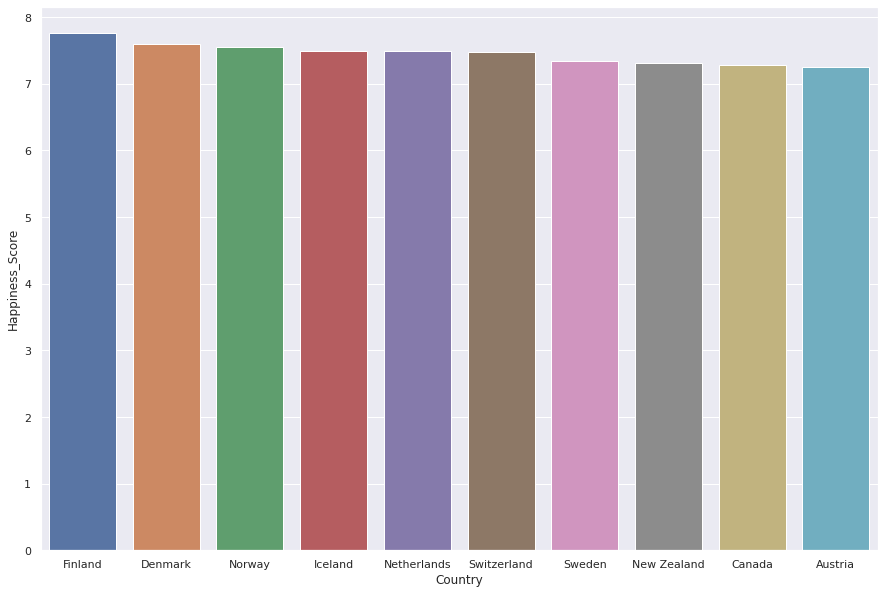

In [86]:
plt.figure(figsize= (15,10))
sns.barplot(x= data_t['Country'].head(10), y= data_t['Happiness_Score'].head(10))
plt.show()